In [6]:
import numpy as np
import random
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import gc, warnings
from SepsisFormer_shap_8 import *
import os
import shap
import matplotlib.pyplot as plt
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
gc.enable()
warnings.filterwarnings("ignore")

def stander_data(data):
    """
        数据集标准化
    """
    data1 = data.iloc[:, :-1] # 标签不用归一化
    data2 = data.iloc[:, -1:]
    # 归一化
    # print(data.shape)
    data1 = data1.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)
    data = pd.concat([data1, data2], axis=1)
    return data

class TabDataset(Dataset):
    def __init__(self, features, target=None):
        super().__init__()
        self.features = features
        self.target = target

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        features = self.features[idx]

        _dict = {'features': torch.FloatTensor(features)}
        # _dict = {'features': torch.FloatTensor(features),}

        if self.target is not None:
            target = self.target[idx].item()
            # _dict.update({'target': torch.tensor(target, dtype=torch.float)})
            _dict.update({'target': torch.tensor(target, dtype=torch.int32)})
        #         """
        return _dict
print("done")

done


In [7]:
# path=path
# out_path=outsave
device =  'cpu'
print(device)
model = Transformer(dim=8)
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
model.load_state_dict(torch.load(r'logs\SepsisFormer\20240411-10-26_8_smote_5000_lr0.0006_SepsisFormer_pretrain_3_eICU\pre_best_acc_model.pth',map_location='cpu'), strict=True)
# model.load_state_dict(torch.load(path+'pre_best_acc_model.pth',
#                                     map_location='cpu'), strict=True)

model.to(device)
model.eval()
print("done")

cpu
done


In [8]:
feature_name = ['aPTT','INR',
                    'Lymphocytes','Monocytes','Neutrophil','WBC','PLT','age']
standard_post_test_features_labels = pd.read_csv('data/data_04_20/mimic3_2371_8.csv')  # .iloc[:40, :]
print('标准化前',standard_post_test_features_labels.shape)
# standard_post_test_features_labels = stander_data(standard_post_test_features_labels)
# print('标准化后',standard_post_test_features_labels.shape)
new_idx = [1, 5, 2, 3, 6, 4, 7, 0]
standard_post_test_features_labels.pop('dead')
test=standard_post_test_features_labels
print(standard_post_test_features_labels.shape)
standard_post_test_features_labels.columns = feature_name
post_test_features = standard_post_test_features_labels.iloc[:, :]
test_data = post_test_features.to_numpy()
test_data_ = test_data
batch_size = 10
test_dataset = TabDataset(test_data)
test_dataset = DataLoader(test_dataset, batch_size=batch_size)
shap_values_0 = np.empty(shape=(1, standard_post_test_features_labels.shape[1]))
shap_values_1 = np.empty(shape=(1, standard_post_test_features_labels.shape[1]))

标准化前 (2371, 9)
(2371, 8)


In [9]:
'''
#生成shap数据'''
for d, test_data in enumerate(test_dataset):
    test_data = test_data['features']
    # print(type(test_data))
    test_data = test_data.numpy()
    # print(type(test_data),test_data.shape)
    # explainer = shap.GradientExplainer(model, test_data)
    explainer = shap.KernelExplainer(model, test_data)
    shap_values = explainer.shap_values(test_data)
    shap_values_0 = np.concatenate([shap_values_0, shap_values[0]], axis=0)
    shap_values_1 = np.concatenate([shap_values_1, shap_values[1]], axis=0)
    # shap_values = np.array(shap_values)  
    # shap_values_0 = np.concatenate([shap_values_0, shap_values[:,:,0]], axis=0)
    # shap_values_1 = np.concatenate([shap_values_1, shap_values[:,:,1]], axis=0)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
shap_df0 = pd.DataFrame(shap_values_0)
shap_df1 = pd.DataFrame(shap_values_1)
# shap_df0.to_csv(os.path.join(out_path, "autoformer_2371_36_0.csv"),index=False)
# shap_df1.to_csv(os.path.join(out_path, "autoformer_2371_36_1.csv"),index=False)


# shap_values_0 = pd.read_csv(os.path.join(out_path, "autoformer_2371_36_0.csv")).to_numpy()
# shap_values_1 = pd.read_csv(os.path.join(out_path, "autoformer_2371_36_1.csv")).to_numpy()
shap_values_0 = shap_values_0[1:]
shap_values_1 = shap_values_1[1:]
shap_values = [shap_values_0, shap_values_1]

feature_importance = pd.DataFrame()  
feature_importance['feature'] = feature_name[:]
feature_importance['importance'] = np.abs(shap_values[1]).mean(0)
feature_importance = feature_importance.iloc[new_idx].reset_index(drop=True)
feature_name = [feature_name[i] for i in new_idx]
print(feature_importance)
print(shap_values_1.shape)
inx_list = []
    
print("超过范围的值：", inx_list)
print("test_data_:", test_data_.shape)
print("shap_values:", len(shap_values))
print("shap_values_0:", len(shap_values_0))

       feature  importance
0          INR    0.067042
1          WBC    0.063780
2  Lymphocytes    0.043651
3    Monocytes    0.024249
4          PLT    0.083170
5   Neutrophil    0.054693
6          age    0.066834
7         aPTT    0.054119
(2371, 8)
超过范围的值： []
test_data_: (2371, 8)
shap_values: 2
shap_values_0: 2371


In [11]:
shap_values[1][1]

array([-6.56344884e-02,  1.42140170e-02, -6.41096291e-05,  3.09410932e-02,
       -9.92761300e-02, -1.40003995e-01, -4.54391047e-02,  6.06876216e-03])

In [12]:
data=pd.DataFrame(shap_values[1])
# data.to_csv("a.csv")

In [13]:
expected_value = explainer.expected_value
expected_value = expected_value[1]

In [14]:
# data=[1,4,13]
# data=range(10)

In [15]:
a=[79,182,189,190,193,230,232,263,320,340,342,369,370,425,426,431,435,453,454,462,487,
     491,497,503,504,521,551,557,578,606,608,616,633,643,677,678,681,715,724,728,733,
     762,775,790,828,831,853,885,923,928,933,948,951,985,992,993,1007,1040,1070,1091,1126,
     1155,1158,1159,1202,1206,1223,1228,1231,1252,1260,1309,1312,1321,1366,1372,1393,1418,
     1422,1433,1435,1490,1504,1537,1550,1584,1608,1610,1628,1634,1636,1649,1651,1685,1694,
     1697,1704,1711,1732,1771,1774,1780,1811,1821,1829,1855,1860,1868,1870,1879,1883,1894,
     1897,1905,1919,1937,1961,1979,1983,2009,2024,2047,2071,2093,2126,2149,2161,2177,2225,
     2230,2257,2293]
# for i in range(2371):
#     print(i)
#     plt.figure(figsize=(8, 7), facecolor='w')
#     shap.decision_plot(expected_value, shap_values[1][i], pd.DataFrame(columns=feature_name, data=test_data),feature_display_range=slice(None,-36,-1),ignore_warnings=True,show=False)
#     path="shap/shap_result_8_1/a/shap"+str(i)+".jpg"
#     plt.savefig(path)

In [16]:
# for i in range(2371):
#     print(i),link="logit"
#     shap.decision_plot(expected_value, shap_values[1][i], pd.DataFrame(columns=feature_name, data=test_data),feature_display_range=slice(None,-36,-1),ignore_warnings=True,link="logit")

In [17]:
# data=[12,13,21,27,42,47,51,59,81,88,91,96,
#      189,190,230,370,453,
#      557,608,633,728,
#      775,1007,1821,1829,1860,1868,1883,2009,2257]
# data=[12,13,21,42,47,59,88,91,96,
#      189,190,230,370,453,
#      557,608,728,
#      775,1829,1868,1883,2009]
# data=[12,13,21,42,47,51,59,81,88,91,96,
#      189,190,
#      633,728,
#      775,1007,1821,1860,1883,2257]
data=[12,96,120,3,35,46,59,101,103,
      189,315,230,232,225,165,193,2257,141,249]
len(data)

19

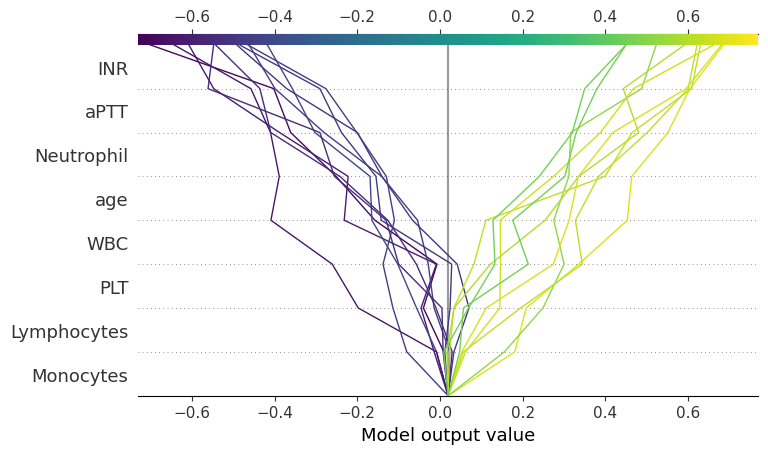

In [18]:
# plt.figure(figsize=(22, 20), facecolor='w') #return_objects=True
shap.decision_plot(expected_value, shap_values[1][data], pd.DataFrame(columns=feature_name, data=test_data),feature_display_range=slice(None,-36,-1),plot_color=plt.get_cmap("viridis"),ignore_warnings=True,show=False)#,show=False
# path="shap/shap_result_8_1/shap2.pdf"
# plt.savefig(path)

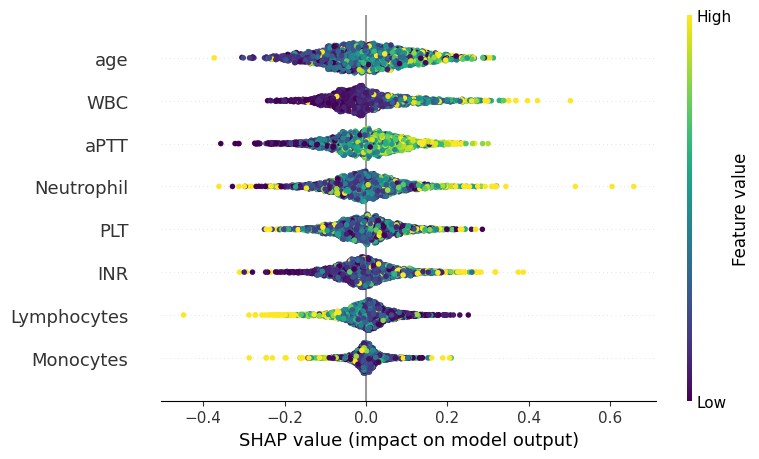

In [19]:
# plt.figure(figsize=(6, 8), facecolor='w')
shap.summary_plot(shap_values_1, test_data_, feature_names=feature_name, max_display=36, cmap="viridis",show=False)
# path="shap/shap_result_8_1/shap.pdf"
# plt.savefig(path)
# shap.summary_plot(shap_values, test_data_, feature_names=feature_name, max_display=36,show=True) 

# shap.summary_plot(shap_values_0, test_data_, feature_names=feature_name,max_display=36, plot_type="bar",show=True) 


In [20]:
test_data_

array([[2.41000000e+01, 1.20000000e+00, 8.03600000e-01, ...,
        1.64000000e+01, 2.76000000e+02, 4.50000000e+01],
       [4.23000000e+01, 5.00000000e+00, 7.00000000e-01, ...,
        5.00000000e+00, 1.93000000e+02, 8.00000000e+01],
       [6.43000000e+01, 3.90000000e+00, 2.00000000e-02, ...,
        2.00000000e+00, 6.90000000e+01, 5.40000000e+01],
       ...,
       [2.46000000e+01, 1.10000000e+00, 1.20960000e+00, ...,
        1.68000000e+01, 3.05000000e+02, 7.50000000e+01],
       [2.51000000e+01, 1.00000000e+00, 9.02100000e-01, ...,
        9.30000000e+00, 1.65000000e+02, 6.60000000e+01],
       [2.86000000e+01, 1.10000000e+00, 1.39440000e+00, ...,
        8.40000000e+00, 7.19999999e+02, 5.50000000e+01]])

In [21]:
shap_values[0]

array([[ 2.46802576e-01,  7.76927137e-02, -7.05477130e-03, ...,
         6.71085306e-02,  5.25665940e-02,  6.22333284e-02],
       [ 6.56344856e-02, -1.42140194e-02,  6.41073330e-05, ...,
         1.40003993e-01,  4.54391023e-02, -6.06876560e-03],
       [-7.68332561e-02, -1.86347243e-01, -4.12146699e-02, ...,
         4.24656717e-02,  7.16112452e-02, -1.48591295e-01],
       ...,
       [-2.48568081e-03,  8.03178201e-03, -2.91365581e-02, ...,
        -9.14907069e-02, -3.17184030e-02, -8.95174885e-02],
       [ 9.59697176e-03,  3.77752893e-02,  5.12157221e-02, ...,
         2.29576826e-02,  5.27819867e-02, -5.77520431e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [22]:
explainer.expected_value

array([0.98038656, 0.01961338])

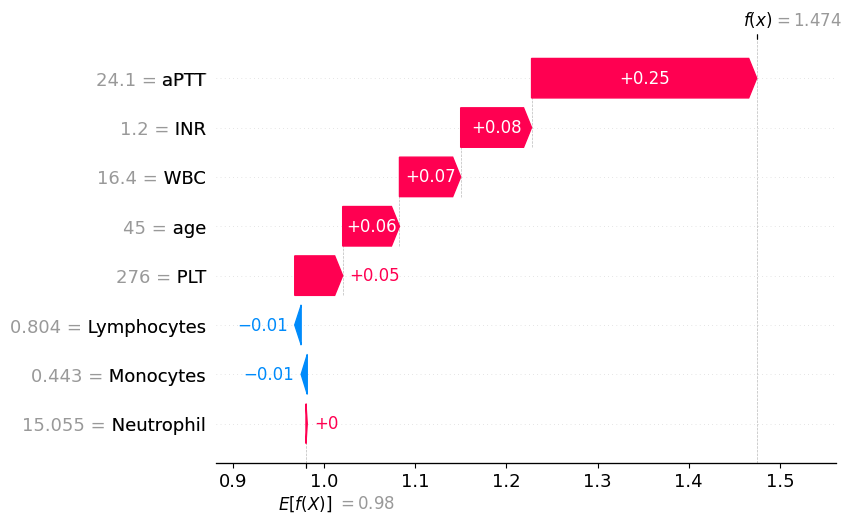

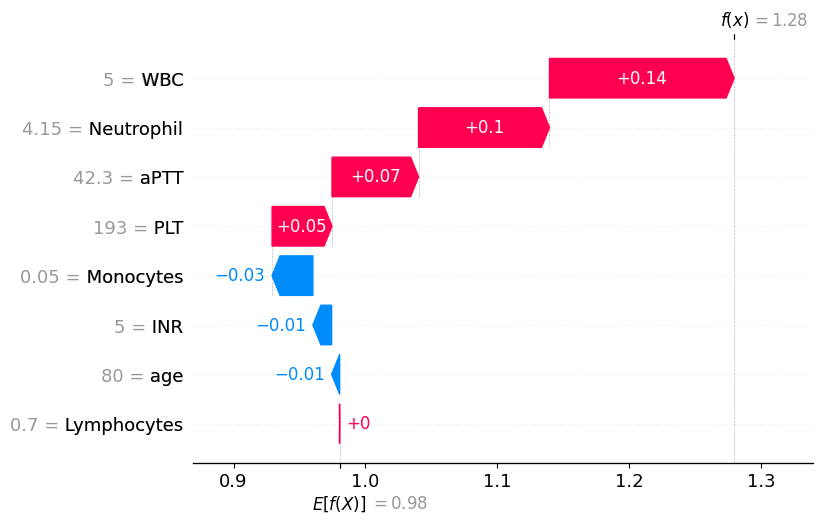

In [23]:
for i in range(2):#2370
    plt.figure(figsize=(8, 7), facecolor='w')
    exp = shap.Explanation(shap_values[0],explainer.expected_value[0], data=post_test_features.values, feature_names=post_test_features.columns)
    shap.plots.waterfall(exp[i],show=False)
    # path="shap/shap_waterfall/shap_"+str(i)+".png"
    # plt.savefig(path,bbox_inches='tight')# bbox_inches='tight'使保存的图像更完整，包含坐标信息。

In [24]:
shap.initjs() #这是为了能够输出shap的图像
for i in range(2371):
    plt.figure(figsize=(8, 7), facecolor='w')
    shap.plots.force(explainer.expected_value[0],shap_values[0][i],post_test_features.iloc[i,:],matplotlib=True,feature_names=post_test_features.columns,show=False)
    path="shap/shap_force/shap_"+str(i)+".png"
    plt.savefig(path,bbox_inches='tight')